In [3]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14, 'xtick.top': True, 'ytick.right': True, 'xtick.direction': 'in', 'ytick.direction': 'in'})

In [4]:
# Load the data 
# Time that the boiler is on, the minimum temperature before and the maximum temperature after heating

df = pd.read_csv("hot_water_data.csv")
df['duration'] = df['duration'] / 60.0 #convert seconds to minutes
df.head(10)

,duration,temp_before,temp_after
0,18.233333,21.00,34.75
1,13.850000,24.50,34.00
2,22.866667,20.00,33.00
3,13.900000,24.50,34.50
4,102.233333,30.75,39.50
5,17.866667,23.25,33.50
6,25.033333,20.00,31.25
7,16.000000,30.00,34.25
8,0.516667,28.75,34.50
9,66.450000,28.75,42.00


In [5]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [6]:
%matplotlib notebook

             Coefficient
duration        0.313697
temp_before     0.320506
Intercept  21.392206229715843
mean squared error 8.502869985850692


<IPython.core.display.Javascript object>


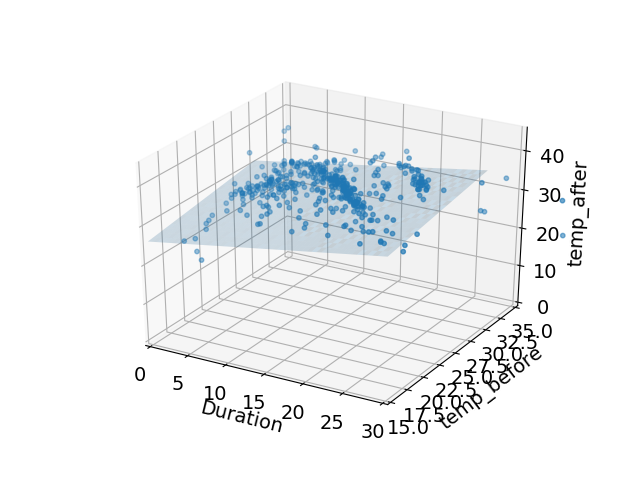

In [7]:
# multivariate linear regression. 

model = linear_model.LinearRegression()
model.fit(df[['duration','temp_before']].values, df['temp_after'])

X,Y = np.meshgrid(np.linspace(0,30,50), np.linspace(15,30,20))
y = model.predict(np.column_stack((X.flatten(), Y.flatten())))



print pd.DataFrame(model.coef_, df[['duration','temp_before']].columns, columns=['Coefficient'])  
print 'Intercept ', model.intercept_
print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration', 'temp_before']]))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['duration'], df['temp_before'], df['temp_after'], s=10 )
ax.plot_surface(X, Y, np.reshape(y, np.shape(X)),  alpha=0.2)

ax.set_xlim(0,30)
ax.set_ylim(15,35)
ax.set_zlim(0,45)

ax.set_xlabel('Duration')
ax.set_zlabel('temp_after')
ax.set_ylabel('temp_before')

plt.show()

   Coefficient
0     0.000000
1     0.330440
2     0.693051
3    -0.030413
4     0.093608
5     0.027164
6     0.000051
7     0.000711
8    -0.002933
9    -0.000565
Intercept  -0.009824524650618116
mean squared error 2.798682918718711


<IPython.core.display.Javascript object>


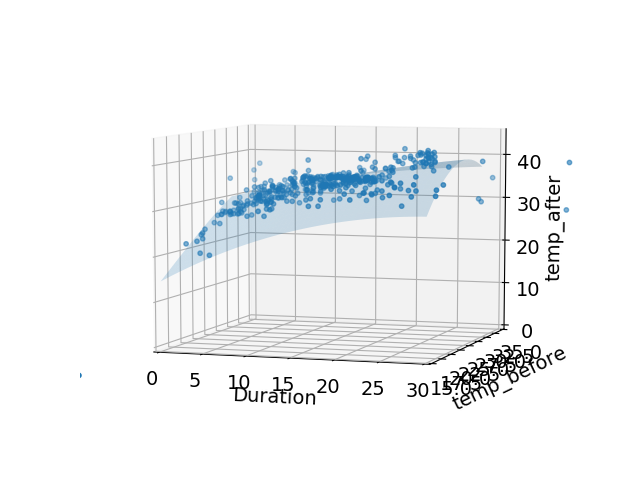

In [9]:
# multivariate linear regression. 

model = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model.fit(df[['duration', 'temp_before']], df['temp_after'])

X,Y = np.meshgrid(np.linspace(0,30,50), np.linspace(15,30,20))
x = np.column_stack((X.flatten(), Y.flatten()))
y = model.predict(x)


print pd.DataFrame(model.steps[1][1].coef_,  columns=['Coefficient'])  
print 'Intercept ', model.steps[1][1].intercept_
print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration', 'temp_before']]))




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['duration'], df['temp_before'], df['temp_after'], s=10 )
ax.plot_surface(X,Y, np.reshape(y, np.shape(X)),  alpha=0.2)

ax.set_xlim(0,30)
ax.set_ylim(15,35)
ax.set_zlim(0,45)

ax.set_xlabel('Duration')
ax.set_zlabel('temp_after')
ax.set_ylabel('temp_before')

plt.show()